In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import j1  # 导入一阶贝塞尔函数

In [3]:
def calculate_D(ka_product, start=-np.pi/2, stop=np.pi/2, num=1000):
    """计算指向性函数
    参数：
        ka_product: k和a的乘积
        start: 起始角度（默认0.0001避免除零）
        stop: 终止角度（默认π）
        num: 采样点数
    返回：
        theta数组和D数组
    """
    theta = np.linspace(start, stop, num)  # 生成角度数组
    numerator = (2 * j1(ka_product * np.sin(theta)))  # 分子保持不变
    denominator = ka_product * np.sin(theta)
    return theta, (numerator / denominator)  # 返回计算结果

# 使用示例（原调用方式需修改为）：
# theta, D = calculate_D(ka_product=1)  # 计算ka=1时的数据


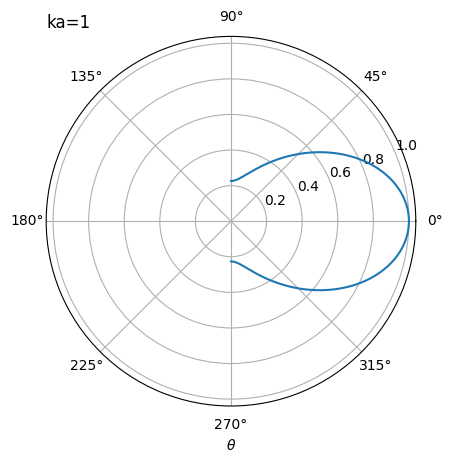

In [4]:
# 绘图
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')  # 创建极坐标轴
theta, D = calculate_D(ka_product=3) 
D = np.abs(D)
ax.plot(theta, D)                             # 在极坐标中绘制
ax.set_xlabel(r'$\theta$')                    # 角度轴标签
ax.set_title(r'ka=1',loc='left')     # 更新标题
ax.grid(True)
plt.show()

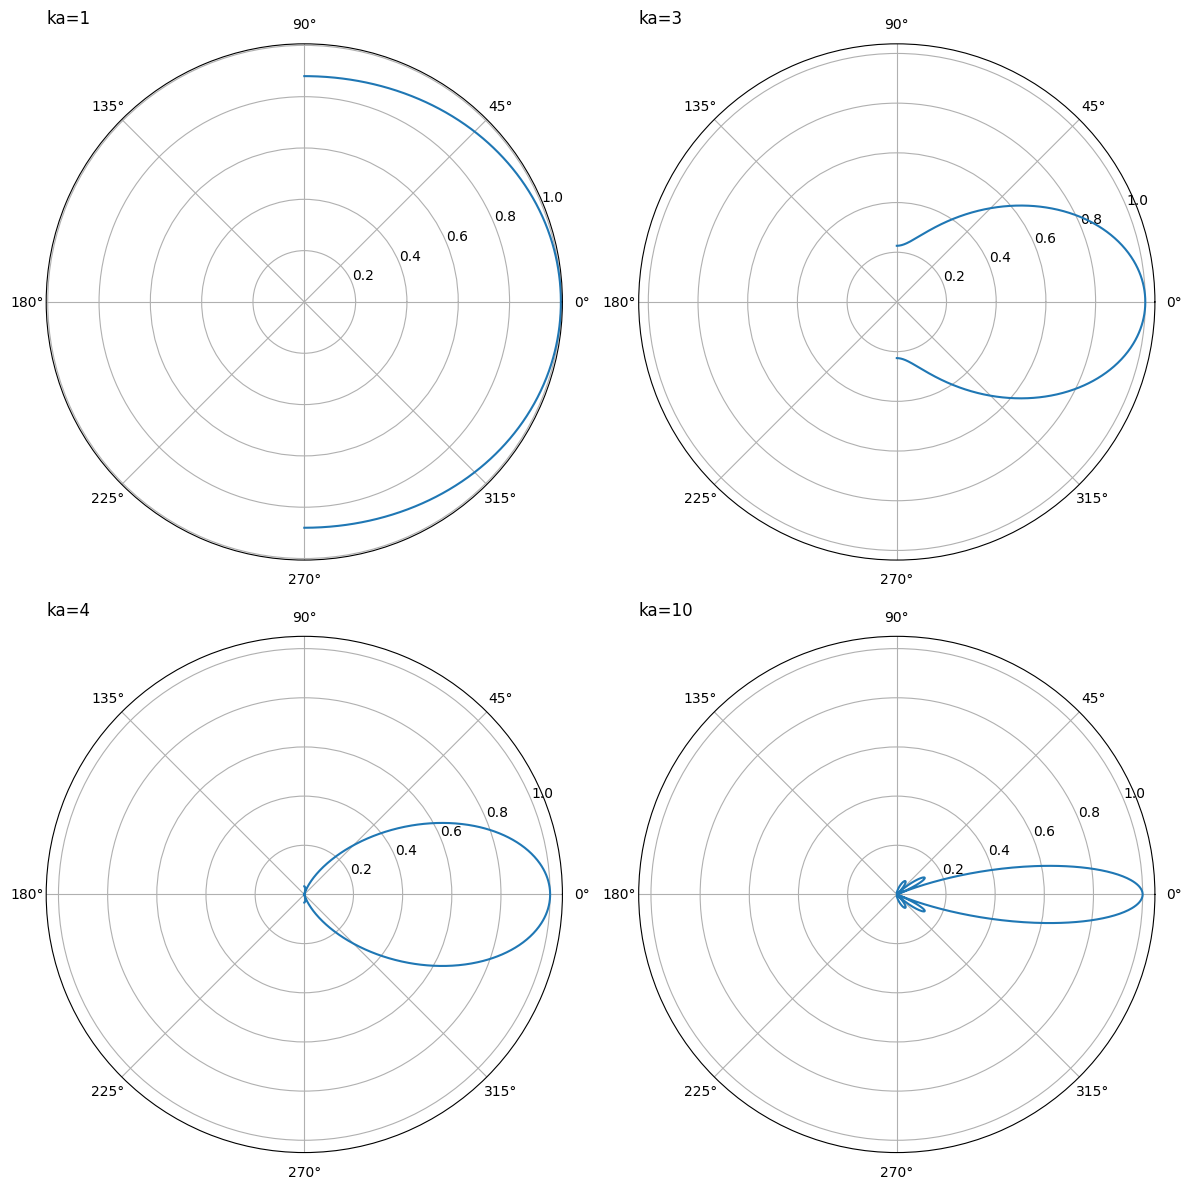

In [5]:
# 绘图
fig, axes = plt.subplots(2, 2, figsize=(12, 12),  # 新增figsize参数调整整体尺寸
                        subplot_kw={'projection': 'polar'})
ka_values = [1, 3, 4, 10]

for ax, ka in zip(axes.ravel(), ka_values):
    theta, D = calculate_D(ka_product=ka)
    D = np.abs(D)
    ax.plot(theta, D)
    ax.set_title(f'ka={ka}', pad=15,loc='left')  # 新增loc参数设置标题位置
    ax.grid(True)

plt.tight_layout()
plt.show()


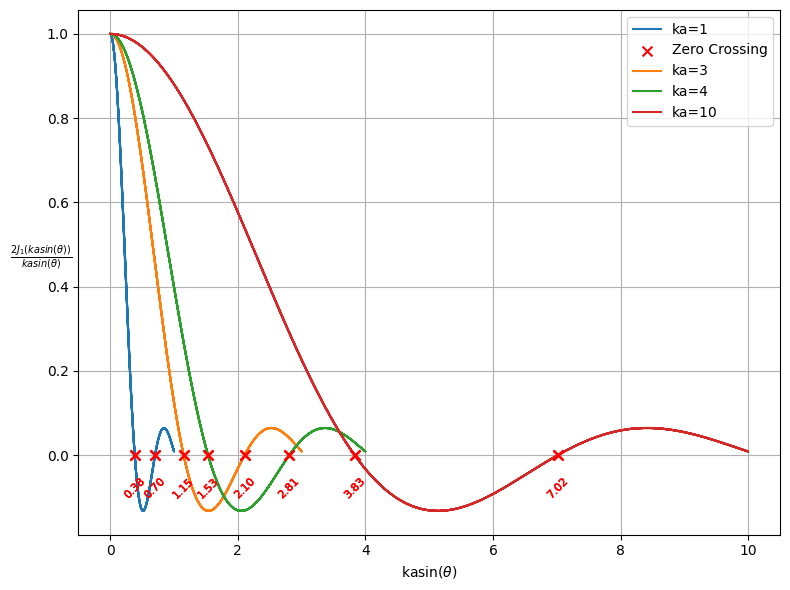

In [6]:
# 新增笛卡尔坐标系绘图
plt.figure(figsize=(8, 6))  # 新建画布
for ka in ka_values:
    theta, D = calculate_D(ka_product=10,start=0.0001,stop=np.pi*2,num=1000)
    x = np.abs(ka * np.sin(theta))
    plt.plot(x, D, label=f'ka={ka}')
   
    # 新增过零点检测
    zero_crossings = np.where(np.diff(np.sign(D)))[0]  # 检测符号变化点
    if len(zero_crossings) > 0:
        x_zeros = x[zero_crossings] + np.diff(x)[zero_crossings] * (-D[zero_crossings]/(D[zero_crossings+1] - D[zero_crossings]))
        plt.scatter(x_zeros, np.zeros_like(x_zeros), color='red', marker='x', s=50, zorder=5, label='Zero Crossing')
        
        # 新增数值标注
        for xz in x_zeros:
            plt.text(xz, -0.05, f'{xz:.2f}',  # 向下偏移0.05避免重叠
                    ha='center', va='top', 
                    rotation=45, fontsize=8,
                    color='red')

# 添加图例去重处理
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.xlabel(r'kasin($\theta$)')
plt.ylabel(r'$\frac{2J_1(kasin(\theta))}{kasin(\theta)}$', rotation=0)
plt.legend(by_label.values(), by_label.keys())
plt.grid(True)  
plt.tight_layout()
plt.show()

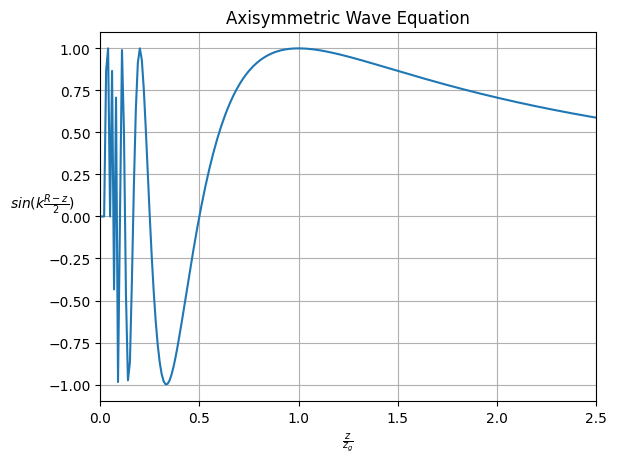

In [15]:
# 定义参数
lam = 1  # 假设波长lambda的值为1
a = 1  # 假设a的值为1
z = np.linspace(0.01, 10, 1000)  # 定义z的取值范围，避免z=0的情况

# 计算横坐标
x = z / (a ** 2 / lam)
zg=a**2/lam
# 计算函数值
y = np.sin((2 * np.pi / lam) * (a ** 2 / (4 * z)))

# 绘制图像
plt.plot(x, y)
plt.xlabel(r'$\frac{z}{z_g}$')
plt.ylabel(r'$sin(k\frac{R-z}{2})$',rotation=0)
plt.xlim(0, 2.5)  # 设置横坐标的范围
plt.title('Axisymmetric Wave Equation')
plt.grid(True)
plt.show()